In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
from sqlalchemy import create_engine
import matplotlib.pyplot as plt

from ma.bolted_joint.components import SHCSFastener, JointMember, Washer
from ma.materials.isotropic import Al6061T6_sheet

# Bolted joint plotting

The goal of this notebook is to provide a basic demonstration of plotting a bolted joint configuration.

In [2]:
db_loc = Path().absolute().parent.parent

engine = create_engine('sqlite:///{}'.format(db_loc.joinpath("src/ma/bolted_joint/fasteners.db")), echo=False)
df_fasteners = pd.read_sql(sql='nas1352',con=engine).set_index('index', drop=True)

In [3]:
cover_bolt = SHCSFastener()
cover_bolt.from_dataframe(df_fasteners.loc['NAS1352-04-8'])

bracket = JointMember(
        material=Al6061T6_sheet,
        thickness=0.2,
        D_c=0.13,
        width=.3,
        kind='clearance',
        D_cs=.150,
        angle_cs=120)

baseplate = JointMember(
        material=Al6061T6_sheet,
        thickness=0.40,
        D_c=0.112,
        kind='tapped_member',
        hole_depth=0.30,
        D_cs=.150,
        angle_cs=120)

washer = Washer(
        D_i=0.112,
        D_o=0.270,
        thickness=0.032,
        D_cs=None,
        angle_cs=None)

[]

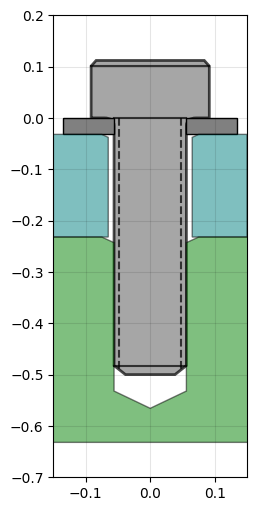

In [4]:
offset = np.cumsum([0.0, -washer.thickness, -bracket.thickness])

fig, ax = plt.subplots(figsize=(2.5,6))

cover_bolt.plot(ax=ax)

washer.plot(ax=ax, y_start=offset[0])
bracket.plot(ax=ax, y_start=offset[1], alpha=0.5, color='teal')
baseplate.plot(ax=ax, y_start=offset[2], alpha=0.5, color='green')

ax.grid(which='both', color='black', alpha=0.1)
ax.set_ylim(-0.7,0.2)
ax.set_xlim(-0.15,0.15)

plt.plot()